Found 12557 images belonging to 21 classes.
Found 3128 images belonging to 21 classes.


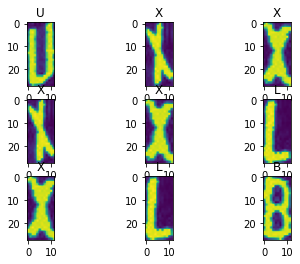

In [1]:
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Z']

ds = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    fill_mode='constant',
    cval=0
)

train_ds = ds.flow_from_directory(
    '../charLabel',
    target_size=(28,12),
    batch_size=128,
    subset='training',
    color_mode='grayscale',
    class_mode='sparse'
)

validation_ds = ds.flow_from_directory(
    '../charLabel',
    target_size=(28,12),
    batch_size=128,
    subset='validation',
    color_mode='grayscale',
    class_mode='sparse'
)

input_shape = train_ds[0][0][0].shape

fig, axs = plt.subplots(3,3)
plt.rcParams["figure.figsize"] = (14,14)

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(validation_ds[0][0][i + j])
        axs[i, j].set_title(class_names[int(validation_ds[0][1][i + j])])

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Conv2D(16, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(32, (3,3), activation='elu', 
    #                        kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
    #                        padding='same'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='elu',
                          kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(21, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 12, 8)         80        
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 12, 8)         32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 12, 16)        1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 12, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 6, 16)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1344)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 1

In [4]:
class stopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('val_accuracy') > 0.999 and logs.get('accuracy') > 0.993) :
            print('\nReached 99.9%\ acuracy so stopping training')
            self.model.stop_training = True

In [5]:
callback = stopCallback()

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='D:\\Code\\AI\\Model\\CharacterRecognitionModel\\version7.hdf5',
                                                               monitor='val_loss',
                                                               mode='min',
                                                               save_best_only=True)

history = model.fit(train_ds, 
                    epochs=125, 
                    callbacks=[model_checkpoint_callback], 
                    validation_data=validation_ds)

Epoch 1/125
99/99 [==============================] - 5s 50ms/step - loss: 2.0722 - accuracy: 0.3715 - val_loss: 2.8114 - val_accuracy: 0.5949
Epoch 2/125
99/99 [==============================] - 5s 47ms/step - loss: 1.3492 - accuracy: 0.6050 - val_loss: 2.4267 - val_accuracy: 0.7046
Epoch 3/125
99/99 [==============================] - 5s 47ms/step - loss: 1.1286 - accuracy: 0.6787 - val_loss: 1.8856 - val_accuracy: 0.8171
Epoch 4/125
99/99 [==============================] - 5s 47ms/step - loss: 0.9771 - accuracy: 0.7293 - val_loss: 1.3128 - val_accuracy: 0.8721
Epoch 5/125
99/99 [==============================] - 5s 47ms/step - loss: 0.8707 - accuracy: 0.7577 - val_loss: 0.8721 - val_accuracy: 0.8955
Epoch 6/125
99/99 [==============================] - 5s 48ms/step - loss: 0.7967 - accuracy: 0.7828 - val_loss: 0.6184 - val_accuracy: 0.9086
Epoch 7/125
99/99 [==============================] - 5s 48ms/step - loss: 0.7394 - accuracy: 0.8023 - val_loss: 0.4935 - val_accuracy: 0.9156
Epoch 

In [ ]:
H = {}
H['character recognition'] = history
plotter = tfdocs.plots.HistoryPlotter(metric='accuracy', smoothing_std=10)
plotter.plot(H)
plt.ylim(0, 3)

NameError: name 'history' is not defined

(0.0, 6.0)

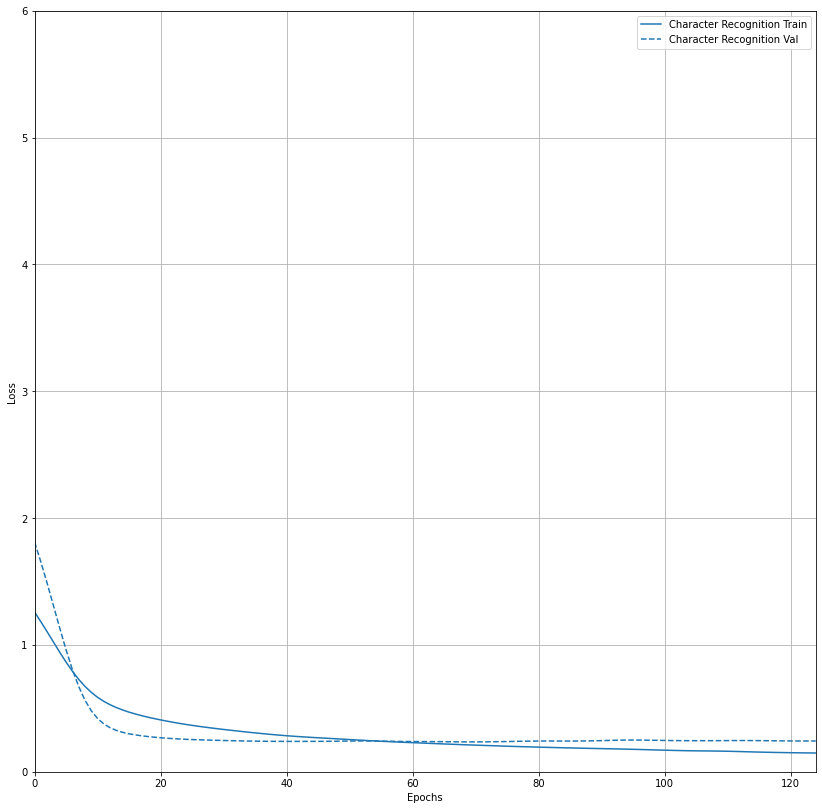

In [ ]:
H = {}
H['character recognition'] = history
plotter = tfdocs.plots.HistoryPlotter(metric='loss', smoothing_std=10)
plotter.plot(H)
plt.ylim(0, 6)